In [1]:
import torch

torch.cuda.is_available()


False

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [4]:
df = pd.read_csv("./Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
x= df.drop(["Species"], axis =1).values
y = le.fit_transform(df["Species"].values)


# chia du lieu voi test size = 20%

X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor (X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)



In [7]:
len(y_train)

120

In [8]:
labels, counts = y_train.unique(return_counts=True)
print(labels , counts) 

tensor([0, 1, 2]) tensor([40, 41, 39])


In [9]:
# tinh dao ham pytorch

# cho y = 2x^4 + x^3 + 3x^2 + 5x + 1
#tinh y' 


In [10]:
import torch 


In [11]:
x  = torch.tensor(2.0, requires_grad=True)
print(x) 
print(x.grad)

tensor(2., requires_grad=True)
None


In [12]:
# dinh nghia ham 
y =2*x**4 +x**3 + 3*x**2 +5*x + 1 
print (y)

tensor(63., grad_fn=<AddBackward0>)


In [13]:
y.grad_fn

In [14]:
# thuc hien lan truyen nguoc va tinh toan cac gradient 

y.backward()

In [15]:
x.grad

tensor(93.)

In [16]:
# BTVN 
# cho y = 5x^5 + 6x^3 - 3x+ 1 

# Cho biet do doc cua da thuc tren o diem nao 

In [17]:
from sympy import symbols, diff, solve, simplify, N

# Khai báo biến
x = symbols('x')

# Đa thức
y = 5*x**5 + 6*x**3 - 3*x + 1

# Đạo hàm bậc 1
dy = diff(y, x)
print("Đạo hàm y':")
print(dy)                # 25*x**4 + 18*x**2 - 3

# Giải phương trình y' = 0
critical_points = solve(dy, x)

print("\nCác nghiệm thực (điểm tới hạn):")
for pt in critical_points:
    if pt.is_real:
        print(f"{pt} ≈ {N(pt, 6)}")

Đạo hàm y':
25*x**4 + 18*x**2 - 3

Các nghiệm thực (điểm tới hạn):
-sqrt(-9/25 + 2*sqrt(39)/25) ≈ -0.373631
sqrt(-9/25 + 2*sqrt(39)/25) ≈ 0.373631


In [ ]:
# BTVN 
# Tạo một tensor ban dau co gia tri la 2
# Định nghĩa hàm số và tính gradient 
# y = x^3 +2x^2 + 5x + 1
# Hãy tính dy/dx tại giá trị của x 
# Dùng phương pháp Gradient DesCent với learning rate alpha = 0.1 để cập nhập giá trĩ  trong 10 vòng lặp 

In [18]:
import torch

# 1. Khởi tạo tensor x với giá trị ban đầu = 2, cần tính gradient
x = torch.tensor(2.0, requires_grad=True)
print("Giá trị ban đầu của x:", x.item())

# 2. Định nghĩa hàm y = x^3 + 2x^2 + 5x + 1
y = x**3 + 2*x**2 + 5*x + 1
print("Giá trị y ban đầu          :", y.item())

# 3. Tính gradient dy/dx (tại điểm x ban đầu)
y.backward()
print("Đạo hàm dy/dx tại x = 2   :", x.grad.item())

# Reset gradient về 0 để chuẩn bị cho vòng lặp Gradient Descent
x.grad.zero_()

# 4. Gradient Descent
learning_rate = 0.1
num_iterations = 10

print("\n" + "="*60)
print("Gradient Descent - 10 vòng lặp (α = 0.1)")
print(f"{'Vòng':<6} | {'x':<12} | {'y':<14} | {'gradient dy/dx':<14} | {'cập nhật Δx':<12}")
print("-"*60)

for i in range(num_iterations + 1):
    # Tính y và gradient (trừ vòng đầu đã tính rồi)
    if i > 0:
        y = x**3 + 2*x**2 + 5*x + 1
        y.backward()
    
    current_grad = x.grad.item() if x.grad is not None else 0.0
    
    print(f"{i:>4}   | {x.item():12.6f} | {y.item():14.6f} | {current_grad:14.6f} | ", end="")
    
    # Cập nhật x (trừ vòng cuối chỉ in kết quả, không cập nhật nữa)
    if i < num_iterations:
        delta_x = -learning_rate * current_grad
        print(f"{delta_x:12.6f}")
        with torch.no_grad():
            x -= learning_rate * x.grad
            x.grad.zero_()   # Reset gradient sau khi cập nhật
    else:
        print("(kết thúc)")

print("="*60)
print(f"\nSau {num_iterations} bước Gradient Descent:")
print(f"   → x cuối cùng ≈ {x.item():.6f}")
print(f"   → y cuối cùng ≈ {y.item():.6f}")
print(f"   → gradient ≈ {x.grad.item():.6f} (gần 0 → gần điểm cực trị)")

Giá trị ban đầu của x: 2.0
Giá trị y ban đầu          : 27.0
Đạo hàm dy/dx tại x = 2   : 25.0

Gradient Descent - 10 vòng lặp (α = 0.1)
Vòng   | x            | y              | gradient dy/dx | cập nhật Δx 
------------------------------------------------------------
   0   |     2.000000 |      27.000000 |       0.000000 |    -0.000000
   1   |     2.000000 |      27.000000 |      25.000000 |    -2.500000
   2   |    -0.500000 |      -1.125000 |       3.750000 |    -0.375000
   3   |    -0.875000 |      -2.513672 |       3.796875 |    -0.379688
   4   |    -1.254688 |      -4.100136 |       4.703972 |    -0.470397
   5   |    -1.725085 |      -6.807298 |       7.027413 |    -0.702741
   6   |    -2.427826 |     -13.660884 |      12.971715 |    -1.297171
   7   |    -3.724998 |     -41.560375 |      31.726830 |    -3.172683
   8   |    -6.897680 |    -266.510193 |     120.143257 |   -12.014326
   9   |   -18.912006 |   -6142.375000 |    1002.343933 |  -100.234393
  10   |  -119.146408 

In [ ]:
# BTVN 03 : 

# Tạo một tập dữ liệu giả lập với x là số giờ học (ngẫu nhiên từ 1- 10 ) và y là số điểm được tính theo công thức y = 3x + 5 + noise 
# với noise là một giá trị ngẫu nhiên nhỏ 
# 1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad = True 
# 2. Tính MSE 
# 3. Tính Gradient 
# 4. Cập nhập tham số w và b bảng Gradient Descent với learning rate alpha = 0.01
# 5. Lặp lại quá trình trên trong 100 vòng lặp để xem sự hội tụ của mô hình. 

Dữ liệu giả lập đã tạo: 100 điểm
True model: y = 3.0x + 5.0

Tham số khởi tạo ban đầu:
w = -1.2842,  b = -0.6917

Huấn luyện Gradient Descent (100 epochs)...
Epoch |   Loss (MSE) |          w |          b
---------------------------------------------
   20 |      11.2660 |     3.6373 |     0.4306
   40 |      10.5705 |     3.5836 |     0.7986
   60 |       9.9664 |     3.5334 |     1.1416
   80 |       9.4416 |     3.4867 |     1.4612
  100 |       8.9857 |     3.4432 |     1.7592

KẾT QUẢ SAU 100 EPOCH:
w cuối cùng = 3.4432   (gần với 3.0)
b cuối cùng = 1.7592   (gần với 5.0)
Loss cuối   = 8.9857


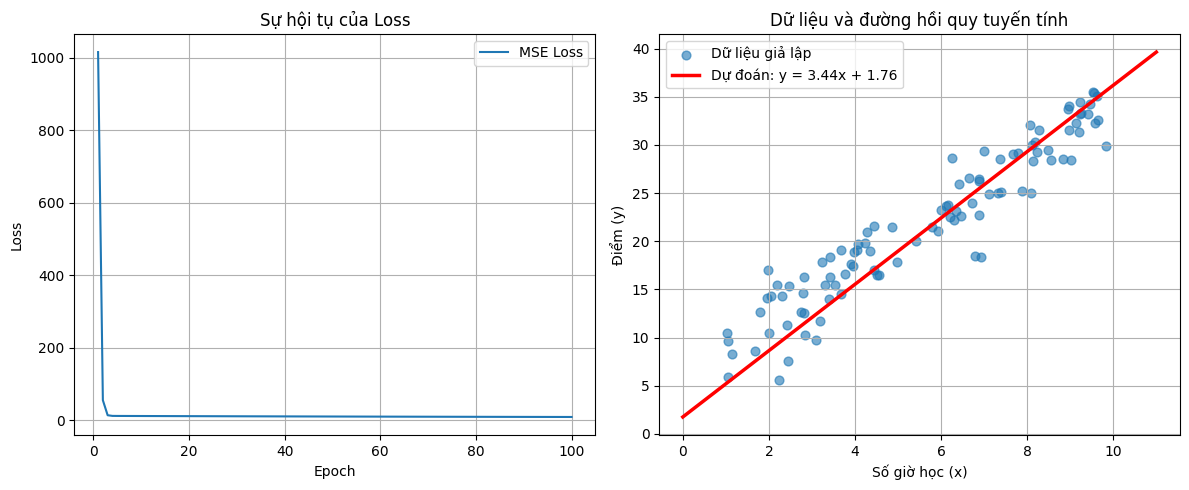

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────
# 1. Tạo dữ liệu giả lập
# ────────────────────────────────────────────────
torch.manual_seed(42)      # để kết quả có thể tái tạo
np.random.seed(42)

n_samples = 100
x = torch.rand(n_samples) * 9 + 1          # x nằm trong khoảng [1, 10]
noise = torch.randn(n_samples) * 3         # noise ~ N(0, 3²) - nhỏ nhưng đủ để thấy
y = 3.0 * x + 5.0 + noise                  # công thức thật: y = 3x + 5 + noise

# Để dễ nhìn, chuyển sang dạng cột (n,1)
x = x.view(-1, 1)
y = y.view(-1, 1)

print(f"Dữ liệu giả lập đã tạo: {n_samples} điểm")
print(f"True model: y = 3.0x + 5.0")

# ────────────────────────────────────────────────
# 2. Khởi tạo tham số w và b (ngẫu nhiên, cần gradient)
# ────────────────────────────────────────────────
w = torch.randn(1, requires_grad=True)     # trọng số
b = torch.randn(1, requires_grad=True)     # bias

print("\nTham số khởi tạo ban đầu:")
print(f"w = {w.item():.4f},  b = {b.item():.4f}")

# ────────────────────────────────────────────────
# 3. Gradient Descent thủ công
# ────────────────────────────────────────────────
learning_rate = 0.01
num_epochs = 100

losses = []           # lưu lịch sử loss để vẽ đồ thị

print("\nHuấn luyện Gradient Descent (100 epochs)...")
print(f"{'Epoch':>5} | {'Loss (MSE)':>12} | {'w':>10} | {'b':>10}")
print("-" * 45)

for epoch in range(num_epochs):
    # Forward: dự đoán
    y_pred = w * x + b
    
    # Tính MSE loss
    loss = torch.mean((y_pred - y) ** 2)
    losses.append(loss.item())
    
    # Backward: tính gradient
    loss.backward()
    
    # Cập nhật tham số (không tính gradient trong bước này)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        # Reset gradient về 0
        w.grad.zero_()
        b.grad.zero_()
    
    # In kết quả mỗi 20 epoch (hoặc epoch cuối)
    if (epoch + 1) % 20 == 0 or epoch == num_epochs - 1:
        print(f"{epoch+1:5d} | {loss.item():12.4f} | {w.item():10.4f} | {b.item():10.4f}")

# ────────────────────────────────────────────────
# 4. Kết quả cuối cùng
# ────────────────────────────────────────────────
print("\n" + "="*50)
print("KẾT QUẢ SAU 100 EPOCH:")
print(f"w cuối cùng = {w.item():.4f}   (gần với 3.0)")
print(f"b cuối cùng = {b.item():.4f}   (gần với 5.0)")
print(f"Loss cuối   = {losses[-1]:.4f}")

# ────────────────────────────────────────────────
# 5. Vẽ đồ thị (tùy chọn - giúp hình dung)
# ────────────────────────────────────────────────
plt.figure(figsize=(12, 5))

# Đồ thị loss hội tụ
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), losses, label='MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sự hội tụ của Loss')
plt.grid(True)
plt.legend()

# Đồ thị dữ liệu + đường hồi quy
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), s=40, alpha=0.6, label='Dữ liệu giả lập')
x_plot = np.linspace(0, 11, 100)
y_plot = w.item() * x_plot + b.item()
plt.plot(x_plot, y_plot, color='red', linewidth=2.5, label=f'Dự đoán: y = {w.item():.2f}x + {b.item():.2f}')
plt.xlabel('Số giờ học (x)')
plt.ylabel('Điểm (y)')
plt.title('Dữ liệu và đường hồi quy tuyến tính')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Pytorch with Tensor 

In [21]:
import torch
import numpy as np

In [22]:
torch.__version__

'2.9.1+cpu'

In [23]:
# chuyen doi mang numpy sang pytorch 

arr = np.array([1,2,3,4,5])

print (arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [24]:
x= torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [25]:
print(x.dtype)

torch.int64


In [26]:
print(x.type())

torch.LongTensor


In [27]:
arr2 = np.arange(0.,12.).reshape(4,3)
arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [28]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [29]:
# Copy and sharing 
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [30]:
arr[0] = 99
print(x)

tensor([99,  2,  3,  4,  5])


In [31]:
arr = np.arange(0,5)
x = torch.tensor(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [32]:
arr[0] = 99
print (x)

tensor([0, 1, 2, 3, 4])


In [ ]:
 #BTVN 04 : Giai thich hai truong hop tren 

In [33]:
#BTVN 05 

#Ban giup thay tao tensor voi empyty , zeros, ones , random , Reshape voi view va view as 

In [34]:
import torch

print("PyTorch version:", torch.__version__)
print("=" * 50)

# ────────────────────────────────────────────────
# 1. Tạo tensor rỗng (empty) - giá trị ngẫu nhiên / rác
# ────────────────────────────────────────────────
empty_tensor = torch.empty(2, 3)
print("\n1. torch.empty(2, 3) → tensor rỗng (giá trị rác trong bộ nhớ):")
print(empty_tensor)

# ────────────────────────────────────────────────
# 2. Tạo tensor toàn 0
# ────────────────────────────────────────────────
zeros_tensor = torch.zeros(3, 4)
print("\n2. torch.zeros(3, 4):")
print(zeros_tensor)

# Tạo zeros với kiểu dữ liệu và device cụ thể
zeros_float = torch.zeros(2, 2, dtype=torch.float32)
print("\n   → zeros kiểu float32:")
print(zeros_float)

# ────────────────────────────────────────────────
# 3. Tạo tensor toàn 1
# ────────────────────────────────────────────────
ones_tensor = torch.ones(2, 5)
print("\n3. torch.ones(2, 5):")
print(ones_tensor)

# ────────────────────────────────────────────────
# 4. Tạo tensor ngẫu nhiên (random)
# ────────────────────────────────────────────────
# a. Phân phối uniform [0, 1)
rand_tensor = torch.rand(3, 3)
print("\n4a. torch.rand(3, 3) → uniform [0, 1):")
print(rand_tensor)

# b. Phân phối chuẩn (normal) mean=0, std=1
randn_tensor = torch.randn(4, 2)
print("\n4b. torch.randn(4, 2) → normal(0,1):")
print(randn_tensor)

# c. Số nguyên ngẫu nhiên
randint_tensor = torch.randint(low=1, high=100, size=(2, 5))
print("\n4c. torch.randint(1..99, size=(2,5)):")
print(randint_tensor)

# ────────────────────────────────────────────────
# 5. Reshape / thay đổi kích thước tensor
# ────────────────────────────────────────────────
print("\n" + "="*50)
print("5. Reshape với .view() và .view_as()")

# Tạo tensor gốc
a = torch.arange(12)          # tensor([ 0,  1,  2, ..., 11])
print("\nTensor gốc (12 phần tử):")
print(a)
print("Shape gốc:", a.shape)

# a. Dùng .view()
b = a.view(3, 4)              # reshape thành 3×4
print("\na.view(3,4):")
print(b)

c = a.view(2, 2, 3)           # reshape thành 2×2×3
print("\na.view(2,2,3):")
print(c)

# b. Dùng .view(-1, ...) → tự động tính chiều còn lại
d = a.view(-1, 6)             # -1 → tự tính → thành 2×6
print("\na.view(-1, 6):")
print(d)

# c. Dùng .view_as() → copy shape từ tensor khác
template = torch.zeros(4, 3)   # shape (4,3)
e = a.view_as(template)
print("\na.view_as(zeros(4,3)):")
print(e)
print("Shape của e:", e.shape)

# Lưu ý quan trọng:
print("\nLưu ý:")
print("- .view() chỉ thay đổi cách nhìn (view) của dữ liệu, KHÔNG copy dữ liệu")
print("- Tổng số phần tử phải giữ nguyên: 12 = 3×4 = 2×6 = 2×2×3 = 4×3")
print("- Nếu muốn copy dữ liệu thật → dùng .reshape() hoặc .clone().view()")

PyTorch version: 2.9.1+cpu

1. torch.empty(2, 3) → tensor rỗng (giá trị rác trong bộ nhớ):
tensor([[0., 0., 0.],
        [0., 0., 0.]])

2. torch.zeros(3, 4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

   → zeros kiểu float32:
tensor([[0., 0.],
        [0., 0.]])

3. torch.ones(2, 5):
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

4a. torch.rand(3, 3) → uniform [0, 1):
tensor([[0.1764, 0.8649, 0.2726],
        [0.3998, 0.0026, 0.8346],
        [0.8788, 0.6822, 0.1514]])

4b. torch.randn(4, 2) → normal(0,1):
tensor([[ 2.6984,  0.9190],
        [-0.1051,  0.1177],
        [ 0.7468, -0.2019],
        [ 1.5077,  0.3483]])

4c. torch.randint(1..99, size=(2,5)):
tensor([[25, 47, 56, 99, 68],
        [48, 76, 26, 66, 17]])

5. Reshape với .view() và .view_as()

Tensor gốc (12 phần tử):
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape gốc: torch.Size([12])

a.view(3,4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
       